# Gaussian anomaly detection

Gaussian anomaly detection, also known as Elliptic Envelope, is a method that assumes the inliers in the data are generated from an elliptical Gaussian distribution. Outliers, on the other hand, are assumed to be points that deviate significantly from this distribution.

Here's how the method works:

1. **Training Phase**:
   - The algorithm fits an elliptical envelope to the data points considered as inliers. It estimates the mean and covariance matrix of the data, assuming that the majority of the data points are drawn from a multivariate Gaussian distribution.
   - The covariance matrix represents the spread and orientation of the data. It captures how each feature varies with every other feature and the degree of correlation between features.

2. **Predicting Anomalies**:
   - After estimating the parameters (mean and covariance matrix) of the multivariate Gaussian distribution, the algorithm computes the Mahalanobis distance for each data point.
   - The Mahalanobis distance measures the distance of a point from the center of the distribution, taking into account the spread and orientation of the data (covariance).
   - Data points that have a high Mahalanobis distance from the center of the distribution are considered potential outliers.
   - The Mahalanobis distance is a measure of the distance between a point and a distribution. It is often used in statistics and machine learning to measure the distance of a data point from the mean of a dataset, accounting for the covariance structure of the data.

  - The Mahalanobis distance $( D )$ between a point $ \mathbf{x} $ and the mean $ \boldsymbol{\mu} $ of a multivariate dataset with covariance matrix $ \mathbf{C} $ is calculated using the following formula:
    
    $ D(\mathbf{x}, \boldsymbol{\mu}) = \sqrt{(\mathbf{x} - \boldsymbol{\mu})^T \mathbf{C}^{-1} (\mathbf{x} - \boldsymbol{\mu})} $

    Here's what each term represents:

    - $ \mathbf{x} $ is the vector representing the data point.
    - $ \boldsymbol{\mu} $ is the mean vector of the dataset.
    - $ \mathbf{C} $ is the covariance matrix of the dataset.
    - $ \mathbf{C}^{-1} $ is the inverse of the covariance matrix.

    In vectorized form, the formula represents the difference between the data point and the mean, scaled by the covariance matrix.

    The Mahalanobis distance is beneficial because it accounts for the correlation between variables. It stretches or shrinks the distance based on the covariance structure of the data. It is a generalized distance metric that reduces to the Euclidean distance when the covariance matrix is the identity matrix.

    In the context of anomaly detection, the Mahalanobis distance is often used to measure the deviation of a data point from the center of a distribution. Points with larger Mahalanobis distances are considered more unusual or anomalous.
3. **Setting a Threshold**:
   - The algorithm then sets a threshold or cutoff point for the Mahalanobis distance to classify points as outliers or inliers.
   - This threshold is often determined based on some notion of the expected percentage of outliers in the dataset (controlled by the `contamination` parameter in scikit-learn's `EllipticEnvelope`).

4. **Predicting Anomaly Scores**:
   - The elliptic envelope model predicts the anomaly score for each data point. This score indicates the likelihood of a point being an outlier.
   - Data points with anomaly scores below the threshold are considered inliers, while those above the threshold are considered outliers.

5. **Visualization (Optional)**:
   - In practice, it's often useful to visualize the decision boundary created by the elliptical envelope. This boundary separates the inliers from the outliers based on the Mahalanobis distance threshold.

The Gaussian anomaly detection method is particularly useful when the data distribution is approximately Gaussian or elliptical and when the majority of data points are inliers. However, it may not perform well if the data distribution is highly non-Gaussian or if there is a significant overlap between inlier and outlier distributions.


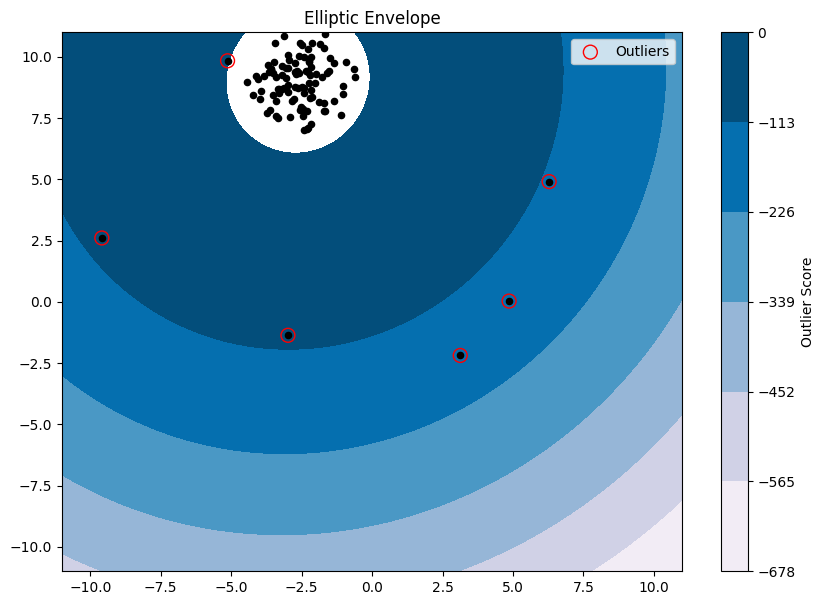

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope

# Generate synthetic data
X, _ = make_blobs(n_samples=100, centers=1, random_state=42, cluster_std=1)
outliers = np.random.uniform(low=-10, high=10, size=(5, 2))
X = np.vstack([X, outliers])

# Fit the model (Gaussian estimator)
clf = EllipticEnvelope(contamination=0.05)  # contamination is the expected percentage of outliers
clf.fit(X)

# Predict the anomaly scores
y_pred = clf.predict(X)

# Plot the data points and decision boundary
xx, yy = np.meshgrid(np.linspace(-11, 11, 500), np.linspace(-11, 11, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 7))

plt.title("Elliptic Envelope")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.colorbar(label="Outlier Score")
plt.scatter(X[:, 0], X[:, 1], color='black', s=20, edgecolor='k')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], marker='o', edgecolor='red', facecolor='none', s=100, label='Outliers')
plt.legend()
plt.xlim(-11, 11)
plt.ylim(-11, 11)
plt.show()


**Note:** Gaussian anomaly detection treats all the data as if it were generated from a single Gaussian distribution. This assumption implies that the data is drawn from a unimodal (single peak) Gaussian distribution with a specific mean and covariance matrix.

In Gaussian anomaly detection:

1. **Single Cluster Assumption**:
   - All the data points are assumed to be generated from the same underlying distribution.
   - The distribution is typically characterized by its mean (center) and covariance matrix (spread and shape).

2. **Assumption of Normality**:
   - Gaussian anomaly detection assumes that the data follows a Gaussian (normal) distribution.
   - This assumption may not always hold true in practice, and the effectiveness of the method can be limited if the data does not conform to a Gaussian distribution.

3. **Identification of Anomalies**:
   - Anomalies or outliers are identified as data points that deviate significantly from the assumed Gaussian distribution.
   - Points that are unlikely to have been generated from the Gaussian distribution are considered anomalies.

4. **Thresholding and Contamination Parameter**:
   - A threshold or contamination parameter is often used to determine which points are considered anomalies.
   - Points with low probabilities of being generated from the Gaussian distribution (e.g., those falling below a certain quantile) are classified as anomalies.

While Gaussian anomaly detection can be effective in many cases, it has limitations, especially when dealing with complex data distributions or when the assumption of normality is violated. In such cases, alternative methods like Local Outlier Factor (LOF), Isolation Forest, or One-Class SVM may be more suitable for detecting anomalies. These methods are more flexible and can capture non-linear or complex data distributions more effectively than Gaussian-based approaches.